# Otoczka wypukła

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

In [2]:
def generate_uniform_points(left=-100, right=100, n=100):
    from random import uniform
    tab = []
    for i in range(n):
        x=uniform(left, right)
        y=uniform(left, right)
        tab.append((x, y))
    return tab

In [64]:
points_a = generate_uniform_points(-100, 100, 100)

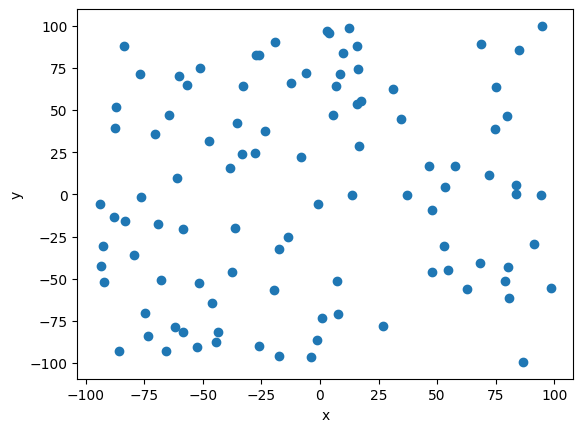

In [65]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

In [5]:
def generate_circle_points(O, R, n=100):
    from random import uniform
    from math import pi, cos, sin
    tab = []
    for i in range(n):
        t = uniform(0, 2*pi)
        x = R*cos(t) + O[0]
        y = R*sin(t) + O[1]
        tab.append((x, y))
    return tab

In [18]:
points_b = generate_circle_points((0, 0), 10, 1000)

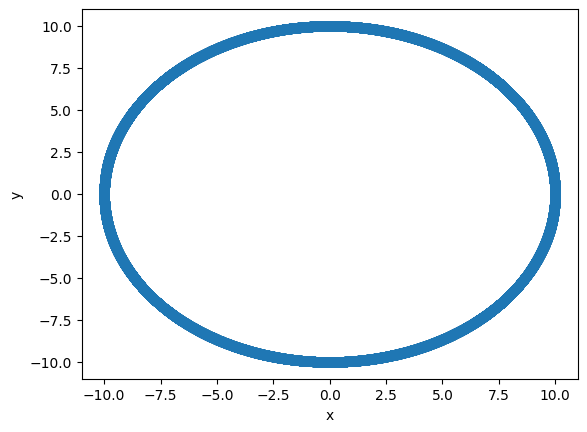

In [7]:
vis.clear()
vis.add_point(points_b)
vis.show()

In [8]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    from random import uniform, randint
    tab = []
    for i in range(n):
        edge = randint(0,3)
        if edge == 0:
            x = uniform(a[0], b[0])
            tab.append((x, a[1]))
        elif edge == 1:
            y = uniform(b[1], c[1])
            tab.append((b[0], y))
        elif edge == 2:
            x = uniform(d[0], c[0])
            tab.append((x, d[1]))
        elif edge == 3:
            y = uniform(a[1], d[1])
            tab.append((a[0], y))
        


    return tab


In [55]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

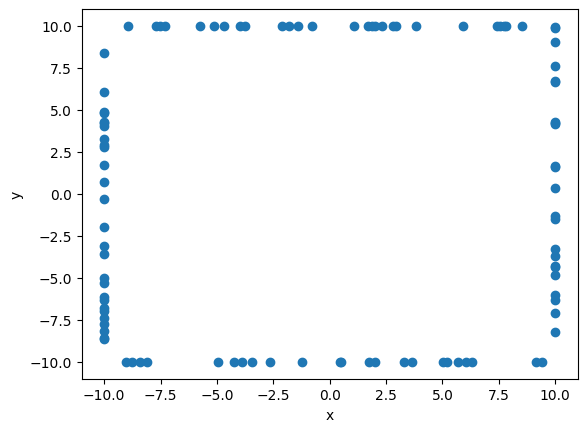

In [56]:
vis.clear()
vis.add_point(points_c)
vis.show()

In [11]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    from random import uniform
    tab=[a,b,c,d]
    for i in range(axis_n):
        x = uniform(a[0], b[0])
        tab.append((x, a[1]))
    for i in range(axis_n):
        y = uniform(a[1], d[1])
        tab.append((a[0], y))
    for i in range(diag_n):
        x = uniform(a[0], c[0])
        y = x*((a[1]-c[1])/(a[0]-c[0]))+a[1]-a[0]*((a[1]-c[1])/(a[0]-c[0]))
        tab.append((x, y))
    for i in range(diag_n):
        x = uniform(d[0], b[0])
        y = x*((d[1]-b[1])/(d[0]-b[0]))+d[1]-d[0]*((d[1]-b[1])/(d[0]-b[0]))
        tab.append((x, y))
        
    return tab

In [79]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

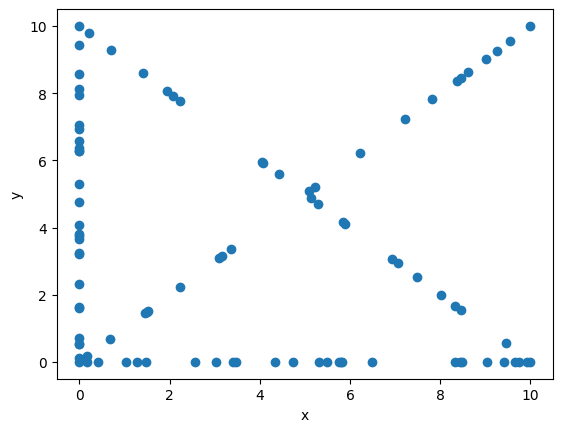

In [70]:
vis.clear()
vis.add_point(points_d)
vis.show()

In [14]:
def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

In [15]:
def dist(a, b):
    return np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
def partition(arr, root, low, high):
    i = (low-1)        
    pivot = arr[high]     
 
    for j in range(low, high):
        if orient(root, arr[j], pivot) == 1 or (orient(root, arr[j], pivot) == 0 and dist(root, arr[j]) > dist(root, pivot)):
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
def quickSort(arr, root, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, root, low, high)
        quickSort(arr, root, low, pi-1)
        quickSort(arr, root, pi+1, high)
def orient(a, b, c,eps=10**-13):
    d = mat_det_3x3(a, b, c)
    if d > eps:
        return 1
    elif d < -eps:
        return -1
    else:
        return 0
    
def Graham(points_raw):
    
    if len(points_raw)<=3:
        return points_raw
    points = points_raw.copy()
    root = min(points, key = lambda k: (k[1],k[0]))
    
    points.remove(root)
    quickSort(points, root, 0, len(points)-1)
    points = [root] + points

    stack = [] 
    stack.append(points[0])
    stack.append(points[1])
    stack.append(points[2])
    i = 3
    while i < len(points):
        
        if orient(stack[-2], stack[-1], points[i]) == 0:
            stack.pop()
            stack.append(points[i])
            i = i + 1    
        elif orient(stack[-2], stack[-1], points[i]) == 1:
            stack.append(points[i])
            i = i + 1
        else:
            stack.pop()

    if orient(stack[-2], stack[-1], root) == 0:
        stack.pop()
        
    lines = [(stack[i], stack[i+1]) for i in range(len(stack)-1)]
    lines.append([stack[-1], stack[0]])
    
            
    return stack

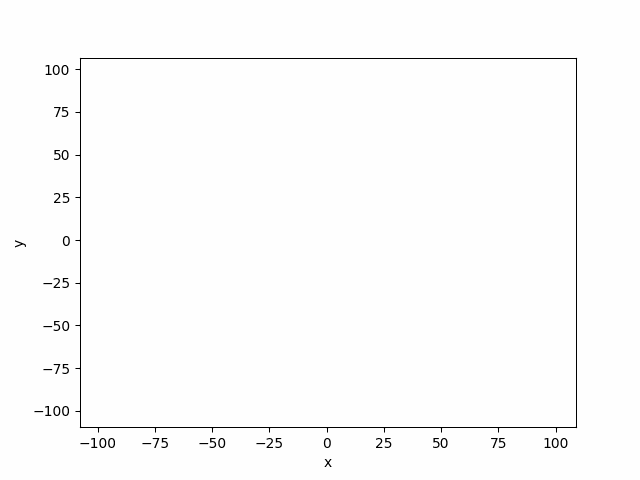

In [11]:
def Graham_draw(points_raw):
    vis.clear()
    vis.add_point(points_raw)
    if len(points_raw)<=3:
        return points_raw
    points = points_raw.copy()
    root = min(points, key = lambda k: (k[1],k[0]))
    
    points.remove(root)
    quickSort(points, root, 0, len(points)-1)
    points = [root] + points

    stack = [] 
    stack.append(points[0])
    stack.append(points[1])
    stack.append(points[2])

    lines=[]
    vis.add_point(stack, color='red')
    lines.append(vis.add_line_segment([stack[0],stack[1]],color = 'blue'))
    lines.append(vis.add_line_segment([stack[1],stack[2]],color = 'blue'))
    
    i = 3
    while i < len(points):
        if orient(stack[-2], stack[-1], points[i]) == 0:
            vis.remove_figure(lines[-1])
            lines.pop()
            vis.add_point(stack.pop(), color='green')
            
            stack.append(points[i])
            vis.add_point(points[i], color='red')
            lines.append(vis.add_line_segment([stack[-1],stack[-2]],color = 'blue'))

            i = i + 1    
        elif orient(stack[-2], stack[-1], points[i]) == 1:
            stack.append(points[i])
            vis.add_point(points[i], color='red')
            lines.append(vis.add_line_segment([stack[-1],stack[-2]],color = 'blue'))
            i = i + 1
        else:
            vis.remove_figure(lines[-1])
            lines.pop()
            vis.add_point(stack.pop(), color='green')

    if orient(stack[-2], stack[-1], root) == 0:
        vis.remove_figure(lines[-1])
        lines.pop()
        vis.add_point(stack.pop(), color='green')
        
    lines = [(stack[i], stack[i+1]) for i in range(len(stack)-1)]
    lines.append([stack[-1], stack[0]])
    
    vis.add_line_segment([stack[-1],stack[0]],color = 'blue')
    return stack

Graham_draw(points_a)
#stworzenie gifa dla 100 punktów zajmuje ponad 2 min dlatego zalecane jest użycie okolo 15 pkt
vis.show_gif(interval=200)  

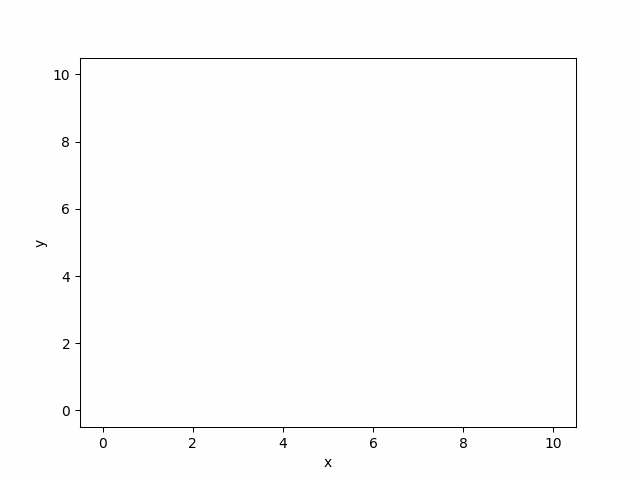

In [80]:
def Graham_draw(points_raw):
    vis.clear()
    vis.add_point(points_raw)
    if len(points_raw)<=3:
        return points_raw
    points = points_raw.copy()
    root = min(points, key = lambda k: (k[1],k[0]))
    
    points.remove(root)
    quickSort(points, root, 0, len(points)-1)
    points = [root] + points

    stack = [] 
    stack.append(points[0])
    stack.append(points[1])
    stack.append(points[2])

    lines=[]
    vis.add_point(stack, color='red')
    lines.append(vis.add_line_segment([stack[0],stack[1]],color = 'blue'))
    lines.append(vis.add_line_segment([stack[1],stack[2]],color = 'blue'))
    
    i = 3
    while i < len(points):
        if orient(stack[-2], stack[-1], points[i]) == 0:
            vis.remove_figure(lines[-1])
            lines.pop()
            vis.add_point(stack.pop(), color='lime')
            
            stack.append(points[i])
            vis.add_point(points[i], color='red')
            lines.append(vis.add_line_segment([stack[-1],stack[-2]],color = 'blue'))

            i = i + 1    
        elif orient(stack[-2], stack[-1], points[i]) == 1:
            stack.append(points[i])
            vis.add_point(points[i], color='red')
            lines.append(vis.add_line_segment([stack[-1],stack[-2]],color = 'blue'))
            i = i + 1
        else:
            vis.remove_figure(lines[-1])
            lines.pop()
            vis.add_point(stack.pop(), color='lime')

    if orient(stack[-2], stack[-1], root) == 0:
        vis.remove_figure(lines[-1])
        lines.pop()
        vis.add_point(stack.pop(), color='lime')
        
    lines = [(stack[i], stack[i+1]) for i in range(len(stack)-1)]
    lines.append([stack[-1], stack[0]])
    
    vis.add_line_segment([stack[-1],stack[0]],color = 'blue')
    return stack

Graham_draw(points_d)
#stworzenie gifa dla 100 punktów zajmuje ponad 2 min dlatego zalecane jest użycie okolo 15 pkt
vis.show_gif(interval=200)  

Czas: 0.0 s
Ilość punktów otoczki: 9
Punkty otoczki: [(86.73350457035872, -99.34009768414649), (98.47834618392685, -55.265174906207704), (94.73715073756188, 99.9264224041323), (12.364194825434666, 98.71842826579976), (-83.6620531688351, 88.07572672581395), (-93.92571021266795, -5.80947815559216), (-93.52444181394704, -42.445030564440245), (-85.8092300514212, -92.62348253152336), (-3.7118019045976496, -96.65566402305646)]


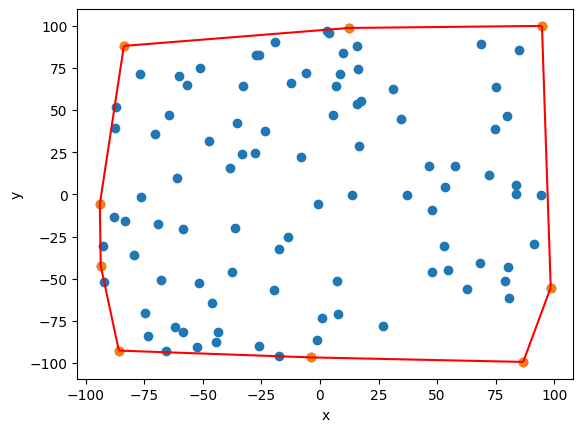

In [71]:
import time
start_time = time.time()
graham_points_a=Graham(points_a)
print("Czas:", time.time() - start_time, "s")
print("Ilość punktów otoczki:", len(graham_points_a))
print("Punkty otoczki:",graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_point(graham_points_a)
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)],  color='red')
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]],  color='red')
vis.show()

Zbiór danych B

Czas: 0.06160855293273926 s
Ilość punktów otoczki: 1000


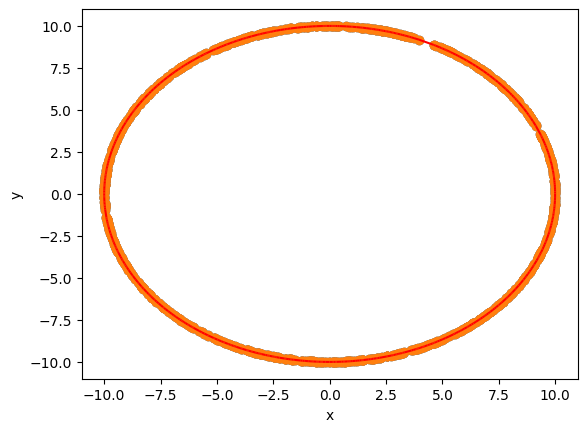

In [19]:
import time
start_time = time.time()
graham_points_b=Graham(points_b)
print("Czas:", time.time() - start_time, "s")
print("Ilość punktów otoczki:", len(graham_points_b))
vis.clear()
vis.add_point(points_b)
vis.add_point(graham_points_b)
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)], color='red')
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]], color ='red')
vis.show()

Zbiór danych C

Ilość punktów otoczki: 8
Czas: 0.0039348602294921875 s
Punkty otoczki: [(-9.029822240365394, -10), (9.412264617179233, -10), (10, -8.225678184245313), (10, 9.962609010883604), (8.524536941906295, 10), (-8.950726685878653, 10), (-10, 8.363774796463133), (-10, -8.615743051145605)]


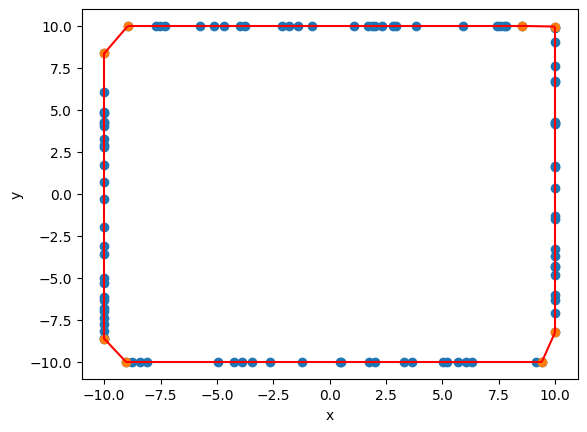

In [72]:
import time
start_time = time.time()
graham_points_c=Graham(points_c)
print("Ilość punktów otoczki:", len(graham_points_c))
print("Czas:", time.time() - start_time, "s")
print("Punkty otoczki:",graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_point(graham_points_c)
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)], color='red')
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]], color ='red')
vis.show()

Zbiór danych D

Ilość punktów otoczki: 4
Czas: 0.004514455795288086 s
Punkty otoczki: [(0, 0), (10, 0), (10, 10), (0, 10)]


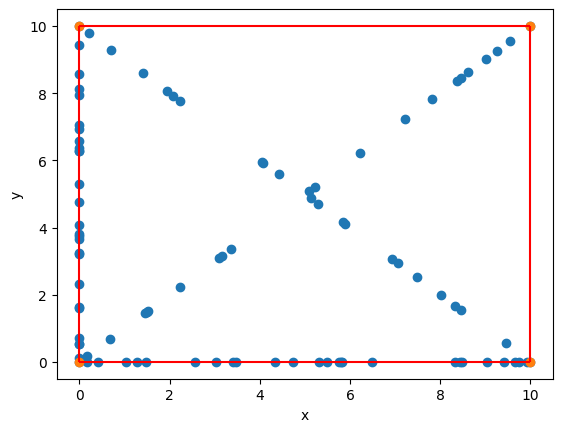

In [74]:
import time
start_time = time.time()
graham_points_d=Graham(points_d)
print("Ilość punktów otoczki:", len(graham_points_d))
print("Czas:", time.time() - start_time, "s")
print("Punkty otoczki:",graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_point(graham_points_d)
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)], color='red')
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]], color ='red')
vis.show()

In [22]:
def Jarvis(points): 
      
    
    root = min(points, key = lambda k: (k[1], k[0]))
    hull = [] 
    pointOnHull = root
    endpoint = points[0]
    
    while(True): 
          
        hull.append(pointOnHull) 
  
        endpoint = points[0]
        for i in range(len(points)): 
            if (orient(pointOnHull, endpoint, points[i]) == -1) or orient(pointOnHull, points[i], endpoint) == 0 and dist(pointOnHull, points[i]) > dist(pointOnHull, endpoint): 
                endpoint = points[i] 

        pointOnHull = endpoint 
  
        if pointOnHull == root: 
            break
            
    lines = [(hull[i], hull[i+1]) for i in range(len(hull)-1)]
    lines.append([hull[-1], hull[0]])
    
    
  
    return hull

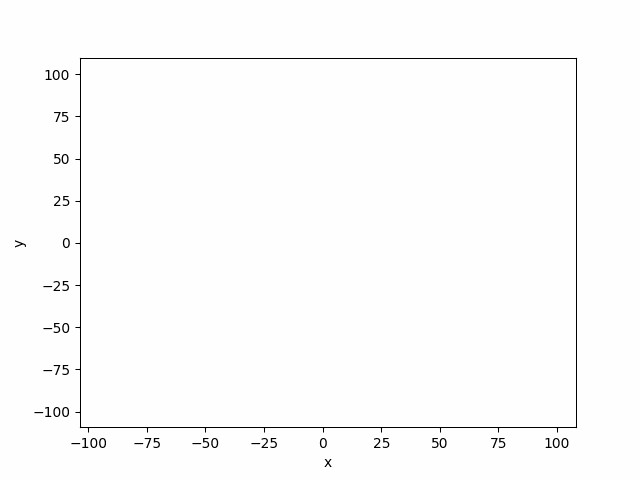

In [68]:
def Jarvis_draw(points): 
    vis.clear()
    vis.add_point(points)
    
    root = min(points, key = lambda k: (k[1], k[0]))
    hull = [] 
    pointOnHull = root
    endpoint = points[0]
    
    while(True): 
          
        hull.append(pointOnHull) 
        vis.add_point(pointOnHull,color='red')
        if len(hull)>1:
            vis.add_line_segment([hull[-1],hull[-2]],color='red')
  
        endpoint = points[0]
        for i in range(len(points)): 
            if (orient(pointOnHull, endpoint, points[i]) == -1) or orient(pointOnHull, points[i], endpoint) == 0 and dist(pointOnHull, points[i]) > dist(pointOnHull, endpoint): 
                endpoint = points[i] 

        pointOnHull = endpoint 
  
        if pointOnHull == root: 
            break
            
    lines = [(hull[i], hull[i+1]) for i in range(len(hull)-1)]
    lines.append([hull[-1], hull[0]])
    
    
    vis.add_line_segment([hull[-1],hull[0]],color='red')
    return hull

Jarvis_draw(points_a)
vis.show_gif(interval=200)  

Zbiór danych A

Ilość punktów otoczki: 9
Czas: 0.003565073013305664 s


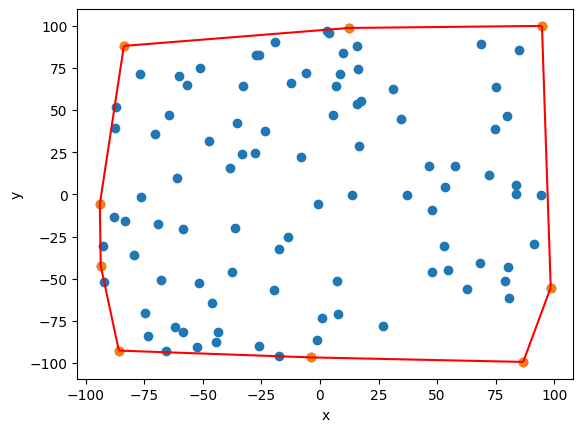

In [66]:
import time
start_time = time.time()
jarvis_points_a=Jarvis(points_a)
print("Ilość punktów otoczki:", len(jarvis_points_a))
print("Czas:", time.time() - start_time, "s")
vis.clear()
vis.add_point(points_a)
vis.add_point(jarvis_points_a)
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)],color='red')
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]],color='red')
vis.show()

Zbiór danych B

Ilość punktów otoczki: 1000
Czas: 2.5736093521118164 s


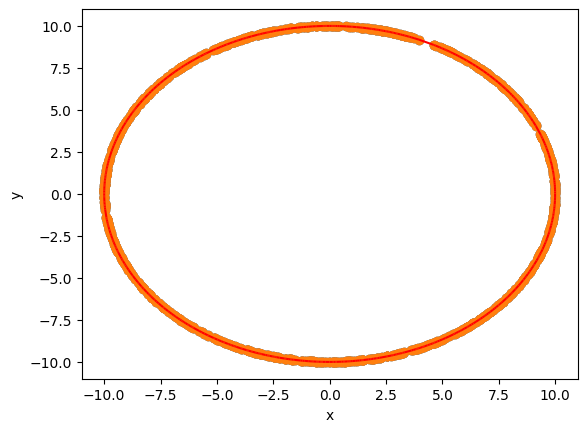

In [37]:
import time
start_time = time.time()
jarvis_points_b=Jarvis(points_b)
print("Ilość punktów otoczki:", len(jarvis_points_b))
print("Czas:", time.time() - start_time, "s")
vis.clear()
vis.add_point(points_b)
vis.add_point(jarvis_points_b)
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)],color='red')
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]],color='red')
vis.show()

Zbiór danych C

Ilość punktów otoczki: 8
Czas: 0.0015442371368408203 s


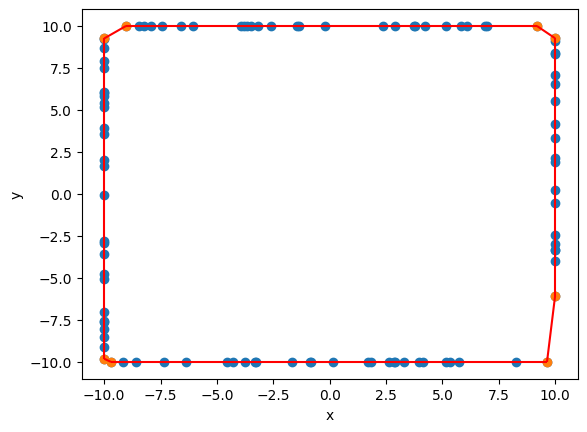

In [38]:
import time
start_time = time.time()
jarvis_points_c=Jarvis(points_c)
print("Ilość punktów otoczki:", len(jarvis_points_c))
print("Czas:", time.time() - start_time, "s")
vis.clear()
vis.add_point(points_c)
vis.add_point(jarvis_points_c)
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)],color='red')
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]],color='red')
vis.show()

Zbiór danych D

Ilość punktów otoczki: 4
Czas: 1.4645159244537354 s


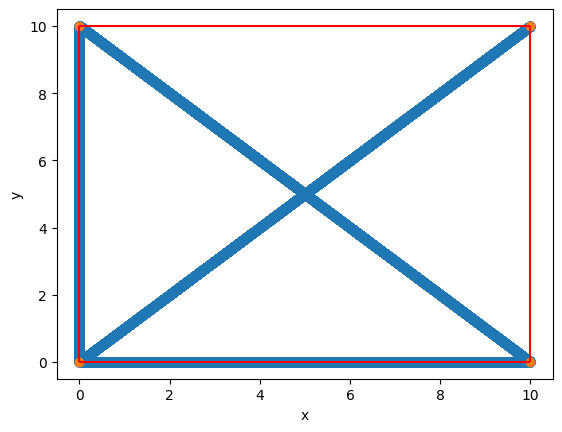

In [39]:
import time
start_time = time.time()
jarvis_points_d=Jarvis(points_d)
print("Ilość punktów otoczki:", len(jarvis_points_d))
print("Czas:", time.time() - start_time, "s")
vis.clear()
vis.add_point(points_d)
vis.add_point(jarvis_points_d)
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)],color='red')
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]],color='red')
vis.show()